<a href="https://colab.research.google.com/github/hosamfa3096/repositorio_IA3/blob/main/Pr%C3%A1ctica_5_T5_DL1_de_04_CON_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Transfer Learning**

https://keras.io/applications/

Redes preentrenadas que se pueden descargar directamente en Keras:

* Xception
* VGG16
* VGG19
* ResNet
* ResNetV2
* InceptionV3
* InceptionResNetV2
* MobileNet
* MobileNetV2
* DenseNet
* NASNet
* Etc.

Algunas requieren un tamaño de imagen de entrada fijo, otras no.

In [ ]:
COLAB = True

In [ ]:
if COLAB:
    %tensorflow_version 1.x
    !pip install h5py==2.10.0

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 33.5 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
# En parte de:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

from IPython.display import SVG, display, clear_output
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

%matplotlib inline

Using TensorFlow backend.


In [ ]:
!ls

sample_data


In [ ]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1e79ErGKTn9ufDriDuToR5EVxfL9T3DRe',
                                        dest_path='./small_data.zip', unzip=True)

Unzipping...Done.


In [ ]:
!ls

__MACOSX  sample_data  small_data  small_data.zip


In [ ]:
!ls small_data

test0  train  validation


In [ ]:
!ls small_data/train

cats  dogs


In [ ]:
!ls small_data/train/cats

cat.0.jpg    cat.250.jpg  cat.400.jpg  cat.551.jpg  cat.701.jpg  cat.852.jpg
cat.100.jpg  cat.251.jpg  cat.401.jpg  cat.552.jpg  cat.702.jpg  cat.853.jpg
cat.101.jpg  cat.252.jpg  cat.402.jpg  cat.553.jpg  cat.703.jpg  cat.854.jpg
cat.102.jpg  cat.253.jpg  cat.403.jpg  cat.554.jpg  cat.704.jpg  cat.855.jpg
cat.103.jpg  cat.254.jpg  cat.404.jpg  cat.555.jpg  cat.705.jpg  cat.856.jpg
cat.104.jpg  cat.255.jpg  cat.405.jpg  cat.556.jpg  cat.706.jpg  cat.857.jpg
cat.105.jpg  cat.256.jpg  cat.406.jpg  cat.557.jpg  cat.707.jpg  cat.858.jpg
cat.106.jpg  cat.257.jpg  cat.407.jpg  cat.558.jpg  cat.708.jpg  cat.859.jpg
cat.107.jpg  cat.258.jpg  cat.408.jpg  cat.559.jpg  cat.709.jpg  cat.85.jpg
cat.108.jpg  cat.259.jpg  cat.409.jpg  cat.55.jpg   cat.70.jpg	 cat.860.jpg
cat.109.jpg  cat.25.jpg   cat.40.jpg   cat.560.jpg  cat.710.jpg  cat.861.jpg
cat.10.jpg   cat.260.jpg  cat.410.jpg  cat.561.jpg  cat.711.jpg  cat.862.jpg
cat.110.jpg  cat.261.jpg  cat.411.jpg  cat.562.jpg  cat.712.jpg  cat.863.jpg
c

In [ ]:
ficheros = glob("./small_data/train/cats/*")
ficheros[0]

'./small_data/train/cats/cat.364.jpg'

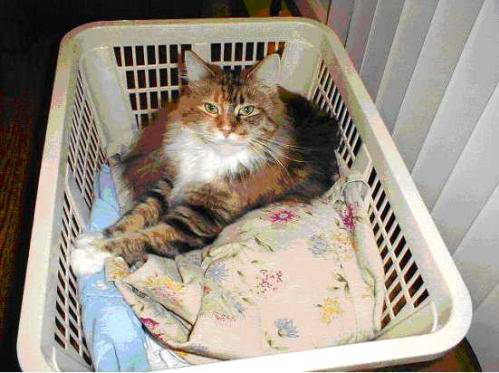

In [ ]:
imagen = load_img(ficheros[7])
imagen

In [ ]:
np.array(imagen).min(), np.array(imagen).max()

(0, 255)

In [ ]:
train_data_dir = 'small_data/train'
validation_data_dir = 'small_data/validation'
test_data_dir = 'small_data/test0'

batch_size = 16

Para ver opciones:

https://keras.io/api/preprocessing/image/#imagedatagenerator-class


In [ ]:

# data augmentation:

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    #fill_mode="constant",
    #fill_mode="reflect",
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
imagen_num = np.array([img_to_array(imagen)])

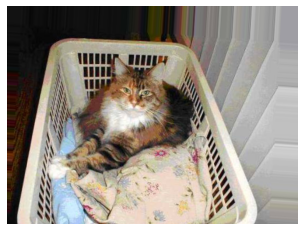

In [ ]:
plt.imshow(train_datagen.flow(imagen_num)[0][0])
plt.axis("off");

## **Red base**

https://keras.io/api/applications/

http://josephpcohen.com/w/visualizing-cnn-architectures-side-by-side-with-mxnet/

In [ ]:
# dimensiones a las que vamos a llevar las imágenes
img_width, img_height = 224, 224

normed_dims = (img_height, img_width)

In [ ]:
normed_dims

(224, 224)

In [ ]:
#from keras.applications.inception_v3 import InceptionV3
#base_model = InceptionV3(
#    weights='imagenet',
    #weights=None, # descarga arquitectura pero inicializa los pesos aleatoriamente
#    include_top=False, # no descarga las últimas capas (las de clasificación)
#    input_shape=(224,224,3))
#preprocess_input = lambda x:x/255. # una "lambda function"

In [ ]:
normed_dims + (3,)

(224, 224, 3)

In [ ]:
from keras.applications.resnet50 import preprocess_input, ResNet50
base_model = ResNet50(include_top=False, weights="imagenet", input_shape=normed_dims + (3,)) # weights=None : pesos aleatorios iniciales

/tensorflow-1.15.2/python3.7/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

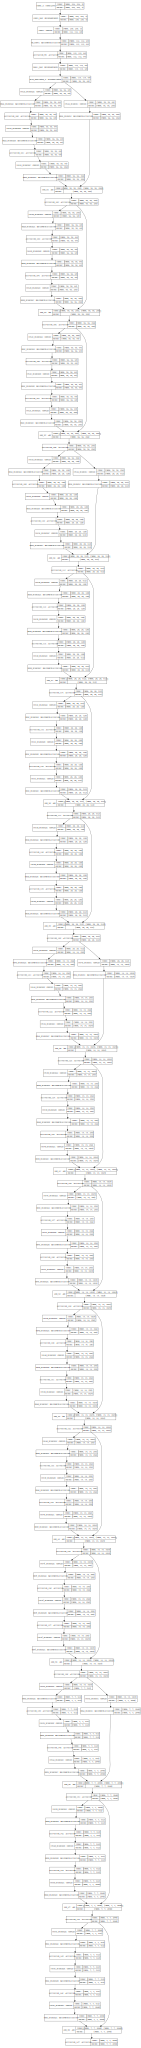

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

if COLAB:
    display(SVG(model_to_dot(base_model, show_shapes=True,dpi=72).create(prog='dot', format='svg')))
else:
    display(SVG(model_to_dot(base_model, show_shapes=True).create(prog='dot', format='svg')))

In [ ]:
7*7*2048

In [ ]:
for layer in base_model.layers:
    #layer.trainable = False # Transfer learning "duro"
    #layer.trainable = True # Retuning de la red descargada (si weights="imagenet")
    layer.trainable = True # Entrenamiento de 0 de la red descargada (si weights=None)

In [ ]:
len(base_model.layers)

175

In [ ]:
#base_model.summary()

In [ ]:
# capas que añado:

aux1 = base_model.output
#aux2 = GlobalAveragePooling2D()(aux1)
aux2 = Flatten()(aux1)
#aux = Dropout(0.7)(aux1) # contra sobreajuste
aux3 = Dense(16, activation='relu',
             #kernel_regularizer=regularizers.l2(0.01) # 0.1, 0.01, 0.001 # contra sobreajuste
             )(aux2)
aux4 = Dense(1, activation="sigmoid")(aux3)
model = Model(input=base_model.input, output=aux4)

model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              metrics=["acc"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

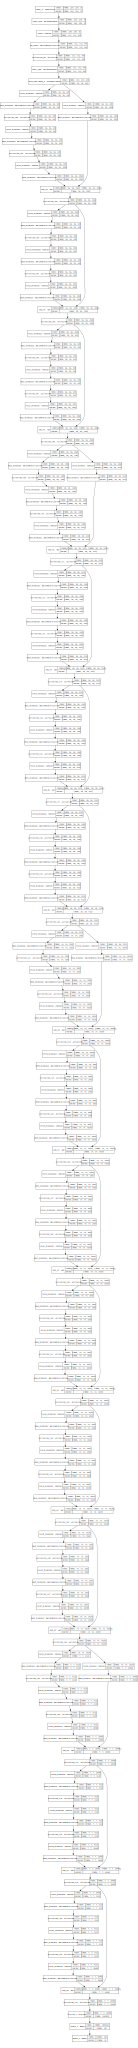

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

if COLAB:
    display(SVG(model_to_dot(model, show_shapes=True,dpi=72).create(prog='dot', format='svg')))
else:
    display(SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')))

In [ ]:
train_datagen = ImageDataGenerator(
    dtype='float32',
    #rescale=1. / 255,
    preprocessing_function = preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_datagen  = ImageDataGenerator(dtype='float32',
                                  #rescale=1. / 255,
                                  preprocessing_function = preprocess_input)

test_datagen = ImageDataGenerator(dtype='float32',
                                  #rescale=1. / 255,
                                  preprocessing_function = preprocess_input)

In [ ]:
validation_data_dir, normed_dims

('small_data/validation', (224, 224))

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
number_train_samples = train_generator.n
number_val_samples   = validation_generator.n
number_test_samples  = test_generator.n

number_train_samples, number_val_samples, number_test_samples

(2000, 802, 2002)

In [ ]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc, val_acc, tr_loss, val_loss, best_i,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1,2,1)
    plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
    plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
    plt.plot(1+best_i, 100*val_acc[best_i], 'or')
    plt.title('tasa de acierto del modelo (%)', fontsize=18)
    plt.ylabel('tasa de acierto (%)', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.subplot(1,2,2)
    plt.plot(1+np.arange(len(tr_acc)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_acc)), np.array(val_loss))
    plt.plot(1+best_i, val_loss[best_i], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

In [ ]:
acum_tr_acc = []
acum_val_acc = []
best_val_acc = -1000
acum_tr_loss  = []
acum_val_loss = []

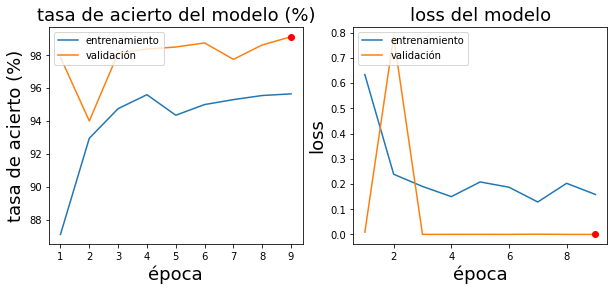

Epoch 1/1
 54/125 [===========>..................] - ETA: 16s - loss: 0.0981 - acc: 0.9722

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-c8c968af9e3d>", line 17, in <module>
    validation_steps=number_val_samples // batch_size
  File "/tensorflow-1.15.2/python3.7/keras/legacy/interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training.py", line 1732, in fit_generator
    initial_epoch=initial_epoch)
  File "/tensorflow-1.15.2/python3.7/keras/engine/training_generator.py", line 185, in fit_generator
    generator_output = next(output_generator)
  File "/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py", line 610, in get
    inputs = future.get(timeout=30)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 651, in get
    self.wait(timeout)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 648, in wait
    self._event.

KeyboardInterrupt: ignored

In [ ]:
epochs = 10

modelpath="model_current_best_parte3.h5"

checkpoint = ModelCheckpoint(modelpath, monitor='val_acc', verbose=1,
                              save_best_only=True,
                              mode='max') # graba sólo los que mejoran en validación
callbacks_list = [checkpoint]
for e in range(epochs):
    history = model.fit_generator(generator = train_generator, 
                                  steps_per_epoch=number_train_samples // batch_size,
                                  epochs=1,
                                  callbacks=callbacks_list,
                                  verbose=1,
                                  shuffle = True,
                                  validation_data=validation_generator,
                                  validation_steps=number_val_samples // batch_size
                                  )
    
    if history.history['val_acc'][-1] > best_val_acc:
        print("Validation accuracy improved from",
            best_val_acc, 'to', history.history['val_acc'])
        print("saving weights")
        best_val_acc = history.history['val_acc'][-1]
        #model.save(modelpath)
    
    acum_tr_acc.append(history.history['acc'][0])
    acum_val_acc.append(history.history['val_acc'][0])
    acum_tr_loss.append(history.history['loss'][0])
    acum_val_loss.append(history.history['val_loss'][0])
    
    if len(acum_tr_acc) > 1:
        clear_output()
        best_i = np.argmax(acum_val_acc)
        grafica_entrenamiento(acum_tr_acc, acum_val_acc, acum_tr_loss, acum_val_loss, best_i)

In [ ]:
model = load_model(modelpath)

## **Resultados obtenidos**

In [ ]:
scores_tr = model.evaluate(train_generator)
print('Train loss    :', scores_tr[0])
print('Train accuracy:', scores_tr[1])
print()

scores_val = model.evaluate(validation_generator)
print('Val loss    :', scores_val[0])
print('Val accuracy:', scores_val[1])
print()

scores_te = model.evaluate(test_generator)
print('Test loss     :', scores_te[0])
print('Test accuracy :', scores_te[1])

125/125 [==============================] - 28s 226ms/step
Train loss    : 0.034043677151203156
Train accuracy: 0.9725000262260437

51/51 [==============================] - 4s 85ms/step
Val loss    : 0.03255395218729973
Val accuracy: 0.9912717938423157

126/126 [==============================] - 9s 75ms/step
Test loss     : 6.172820476990637e-09
Test accuracy : 0.9830169677734375


In [ ]:
y_real = test_generator.classes
y_pred_proba = model.predict_generator(test_generator)
y_pred = np.round(y_pred_proba)
print('')
print(classification_report(y_real, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1002
           1       0.99      0.97      0.98      1000

    accuracy                           0.98      2002
   macro avg       0.98      0.98      0.98      2002
weighted avg       0.98      0.98      0.98      2002



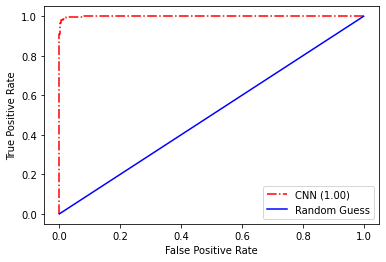

In [ ]:
fpr, tpr, thresholds = roc_curve(y_real, y_pred_proba)
fig, ax1 = plt.subplots(1,1)
ax1.plot(fpr, tpr, 'r-.', label = 'CNN (%2.2f)' % auc(fpr, tpr))
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
ax1.legend();

## **Visualización de ejemplos de test**

In [ ]:
test_datagen2 = ImageDataGenerator(dtype='float32')

test_generator2 = test_datagen2.flow_from_directory(
    test_data_dir,
    target_size=normed_dims,
    batch_size=test_generator.n,
    shuffle=False,
    class_mode='binary')

Found 2002 images belonging to 2 classes.


In [ ]:
test_generator2.reset()
X_te, y_te = test_generator2.next()

In [ ]:
test_generator2.class_indices

{'cats': 0, 'dogs': 1}

Probabilidad perro: 0.98%


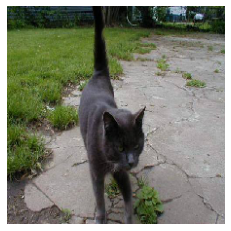

In [ ]:
ind_te1 = 14

image = X_te[ind_te1].copy()

plt.imshow(image/255, cmap='jet')
plt.axis("off")
p = model.predict(preprocess_input(np.array([image])))[0,0]
print("Probabilidad perro: {:2.2}%".format(100*p))

In [ ]:
#keras vis